In [1]:
from coffea import hist
from coffea.util import load

import mplhep as hep
hep.style.use('CMS')
import matplotlib.pyplot as plt

import uproot
fdir = '../macros/'
years = ['2017','UL17']
hists = {y:uproot.open(f'{fdir}/Histograms_{y}.root') for y in years}


/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/nfs/dust/cms/user/albrechs

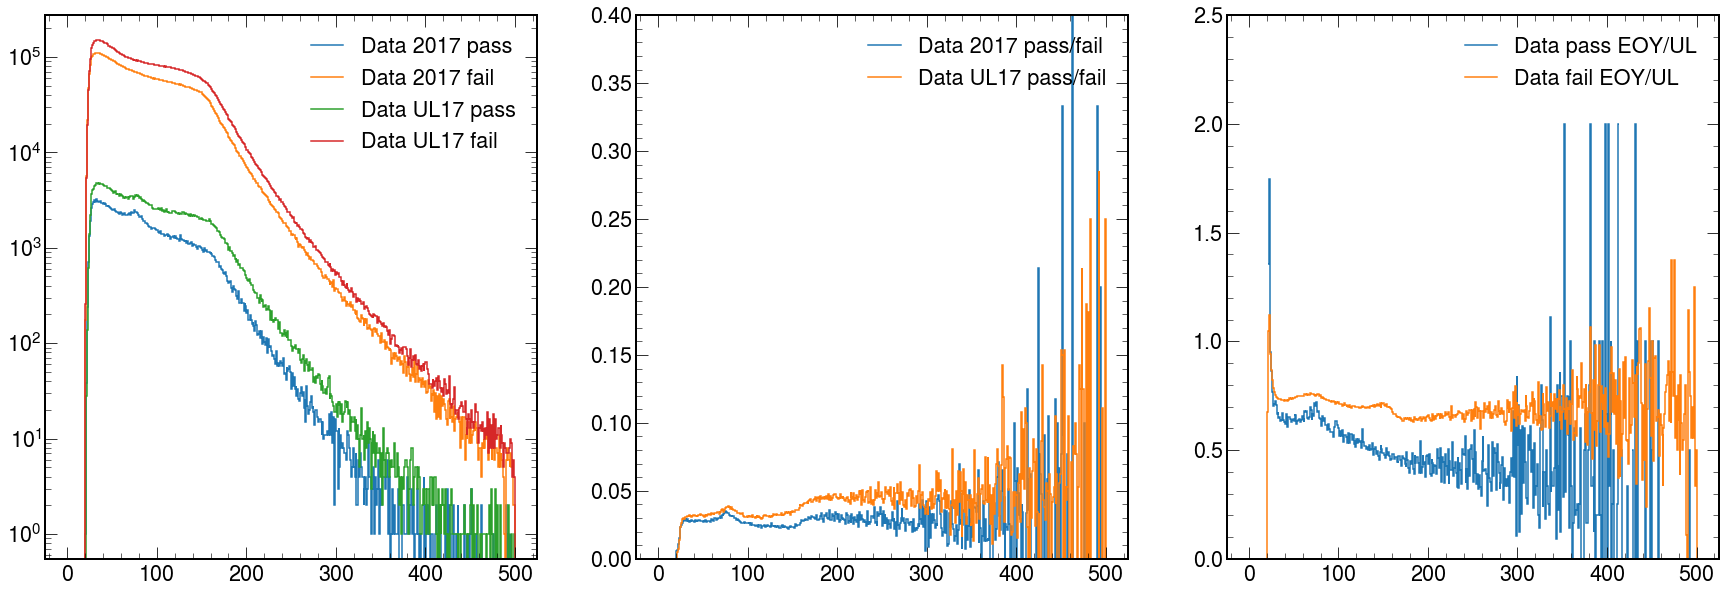

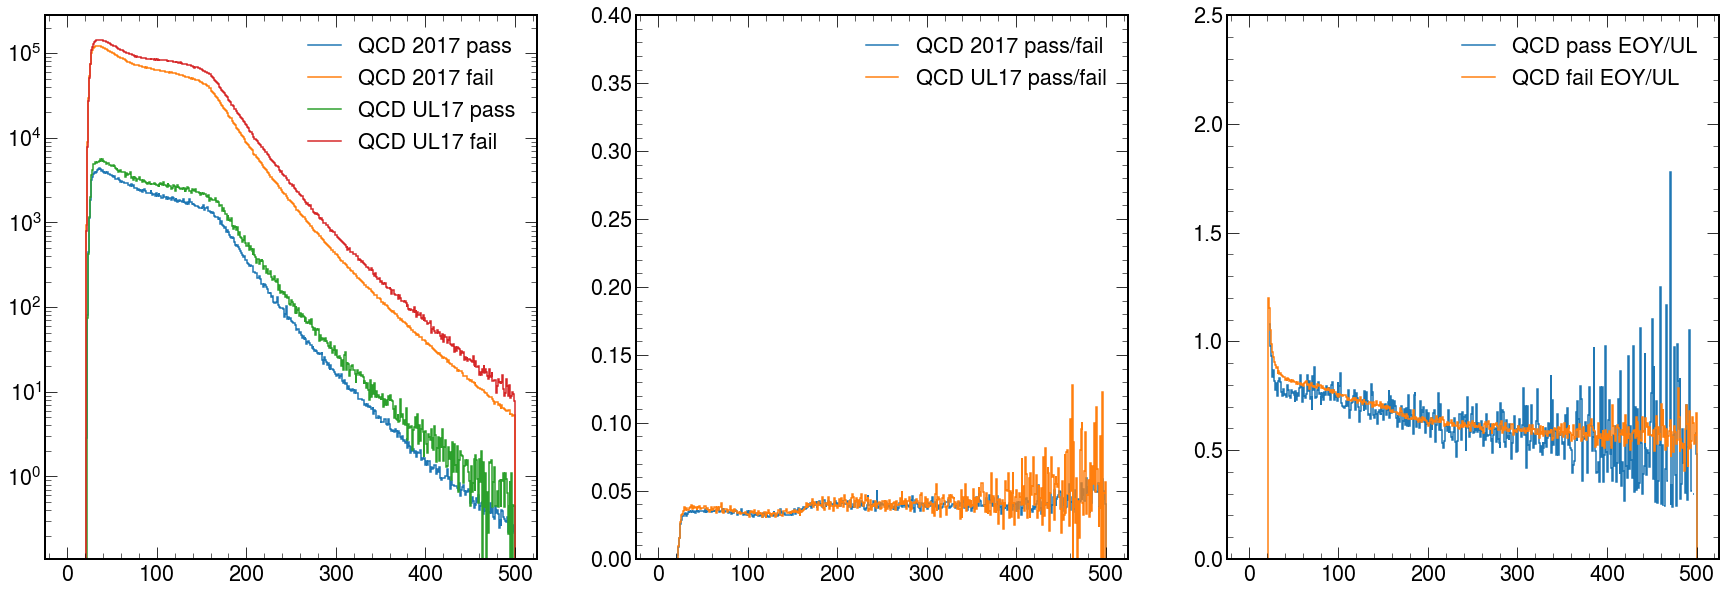

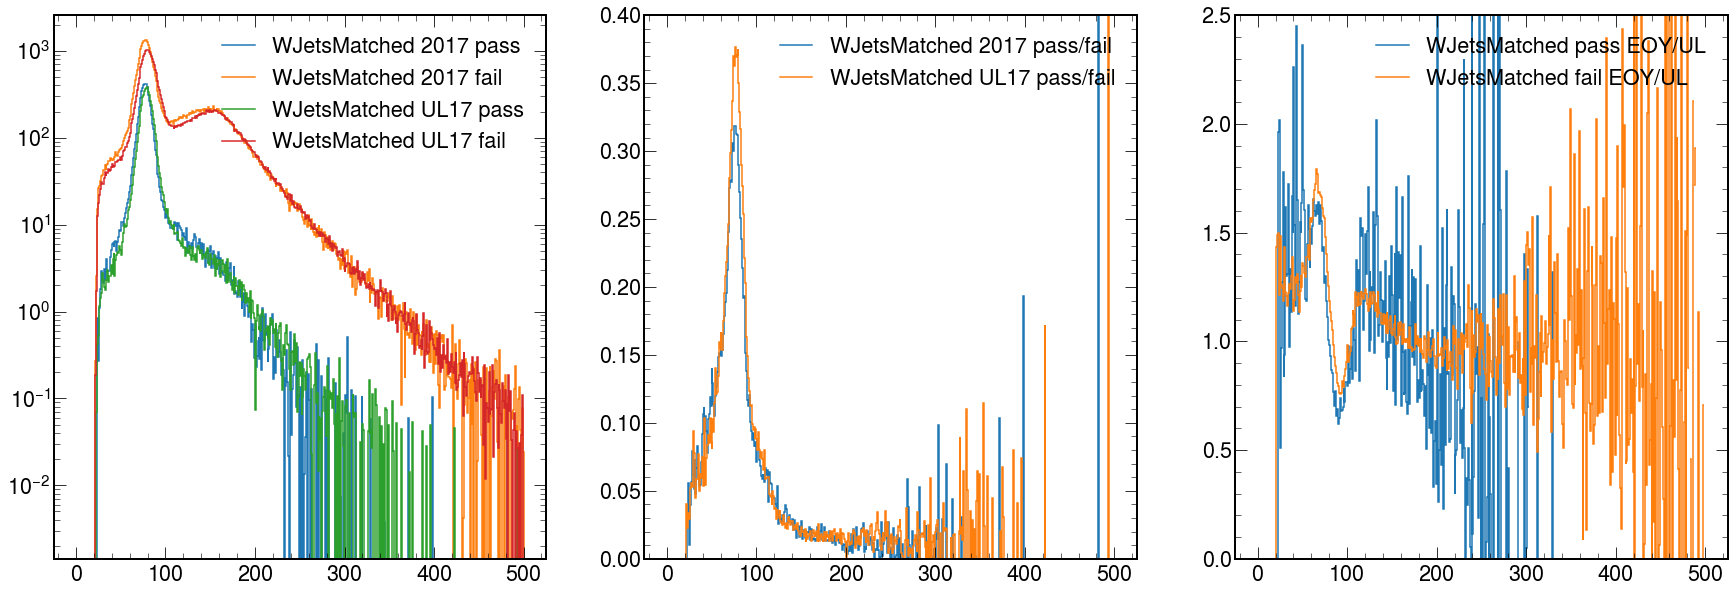

In [23]:
sample = 'Data'
sample = 'QCD'
pt_bin = '500to650'
pt_bin = '650to800'
pt_bin = '800to1200'
pt_bin = 'inclusive'

for sample in ['Data','QCD','WJetsMatched']:
    hist_names = [f'W_{sample}__mjet_{pt_bin}_pass',f'W_{sample}__mjet_{pt_bin}_fail']

    hists_incl = {y:[hists[y][n].to_numpy() for n in hist_names] for y in years}

    f,ax = plt.subplots(1,3,figsize=(30,10))
    for y in years:
        for i,name in enumerate(['pass','fail']):
            hep.histplot(hists_incl[y][i],ax=ax[0],label=f'{sample} {y} {name}')
        
    ax[0].set_yscale('log')
    ax[0].legend()

    for y in years:
        edges = hists_incl[y][0][1]
        pass_ = hists_incl[y][0][0]
        fail_ = hists_incl[y][1][0]
        hep.histplot((pass_/fail_,edges),ax=ax[1],label=f'{sample} {y} pass/fail')
    
    #ax.set_yscale('log')
    ax[1].set_ylim(0,0.4)
    ax[1].legend()
    
    for i,name in enumerate(['pass','fail']):
        edges = hists_incl['2017'][i][1]
        eoy_ = hists_incl['2017'][i][0]
        ul_ = hists_incl['UL17'][i][0]
        hep.histplot((eoy_/ul_,edges),ax=ax[2],label=f'{sample} {name} EOY/UL')
    
    #ax.set_yscale('log')
    ax[2].set_ylim(0,2.5)
    ax[2].legend()

In [30]:
test = load(f'/afs/desy.de/user/a/albrechs/xxl/af-cms/UHH2/10_6_28/CMSSW_10_6_28/src/UHH2/JetMass/python/test.coffea')

In [32]:
hists_ = {y:load(f'/afs/desy.de/user/a/albrechs/xxl/af-cms/UHH2/10_6_28/CMSSW_10_6_28/src/UHH2/JetMass/python/templates_{y}.coffea') for y in years}


In [33]:
hists_['2017']['vjets_mjet_pass'][:,:,'QCD','pt',::sum]

Hist(
  Regular(50, 0, 500, name='mJ', label='$m_{SD}$ [GeV]'),
  Variable([500, 650, 800, 1200], name='pt', label='$p_{T}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=305530, variance=478935) (WeightedSum(value=307295, variance=478956) with flow)

/nfs/dust/cms/user/albrechs/miniconda3/envs/coffea/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


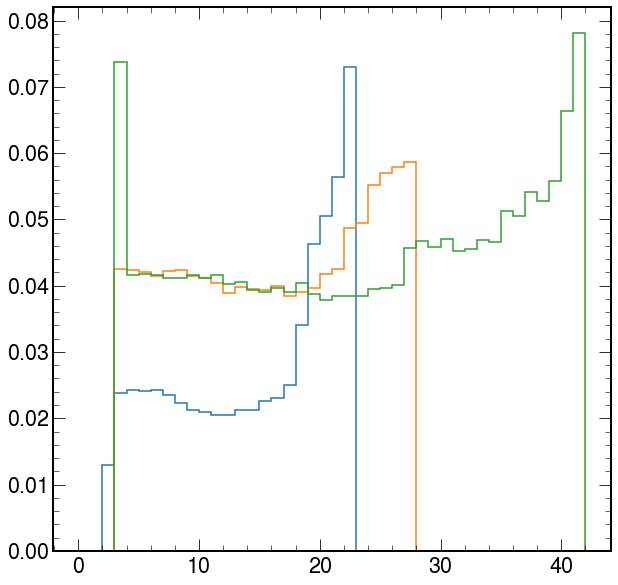

In [34]:
f,ax=plt.subplots()
hep.histplot((hists_['2017']['vjets_mjet_pass'][:,:,'QCD','pt',::sum].values().T/hists_['2017']['vjets_mjet_fail'][:,:,'QCD','pt',::sum].values().T),ax=ax)

ax.legend()

In [35]:
hists_[year]['rho'][:,"QCD",'none'].axes[0].label

'$\\\\rho$'

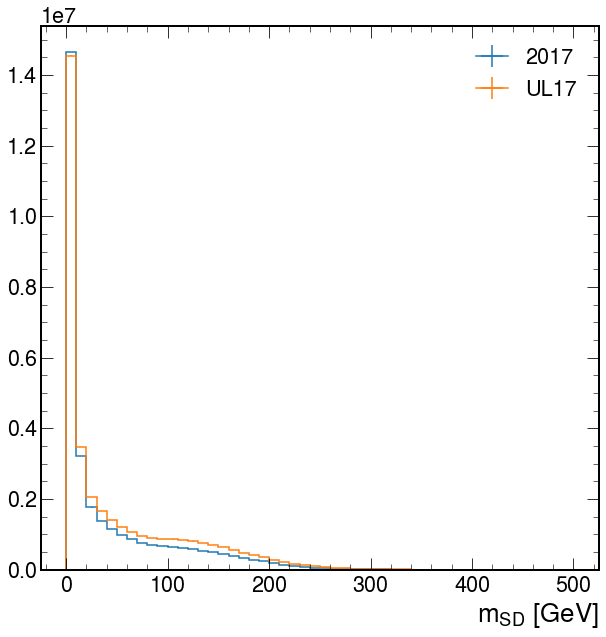

In [39]:
f,ax=plt.subplots()
for year in years:
    hep.histplot(hists_[year]['mjet'][:,"QCD",'none'],ax=ax,label=year)
    #hists_[year]['vjets_mjet_pass']['QCD','pt',::sum,::sum,:].plot(ax=ax,label=year)
ax.legend()
#ax.set_xlim(500,1500)

In [76]:
hists_['ttbar_mjet_inclusive'].to_hist()[:,:,:]

Hist(
  StrCategory(['Data', 'QCD', 'WJetsMatched', 'WJetsUnmatched', 'ZJetsMatched', 'ZJetsUnmatched'], name='dataset', label='Dataset'),
  Variable([200, 300, 400, 500, 650, 100000], name='pt', label='$p_{T}$ [GeV]'),
  Regular(50, 0, 500, name='mJ', label='$m_{SD}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=3671.57, variance=8660.38) (WeightedSum(value=3703.06, variance=8741.95) with flow)

In [18]:
hists_['vjets_mjet_fail'].to_hist()['WJetsMatched',:,:]

Hist(
  Variable([500, 650, 800, 1200], name='pt', label='$p_{T}$ [GeV]'),
  Regular(50, 0, 500, name='mJ', label='$m_{SD}$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=10.5658, variance=4.71994)

In [176]:
histsnew_ = load('/afs/desy.de/user/a/albrechs/xxl/af-cms/UHH2/10_6_28/CMSSW_10_6_28/src/UHH2/JetMass/python/test.coffea')

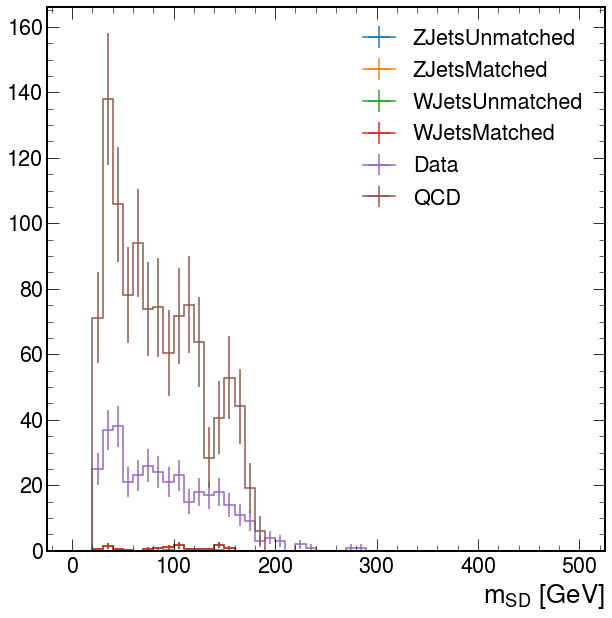

In [188]:
f,ax = plt.subplots()
histsnew_['vjets_mjet_fail'][:,'pt','nominal',::sum,:].plot(ax=ax)
ax.legend()

In [175]:
#f,ax = plt.subplots()
histsnew_['pt'][:,'Data',:]#.plot(ax=ax)#['WJetsMatched','nominal',3,:]
#ax.legend()

Hist(
  Regular(300, 0, 3000, name='pt', label='$p_{T}$ [GeV]'),
  StrCategory(['pt', 'none'], growth=True, name='jecAppliedOn', label='JEC applied on'),
  storage=Weight()) # Sum: WeightedSum(value=1984, variance=1984)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f26a8e22f50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f26a8dc5590>, text=[])

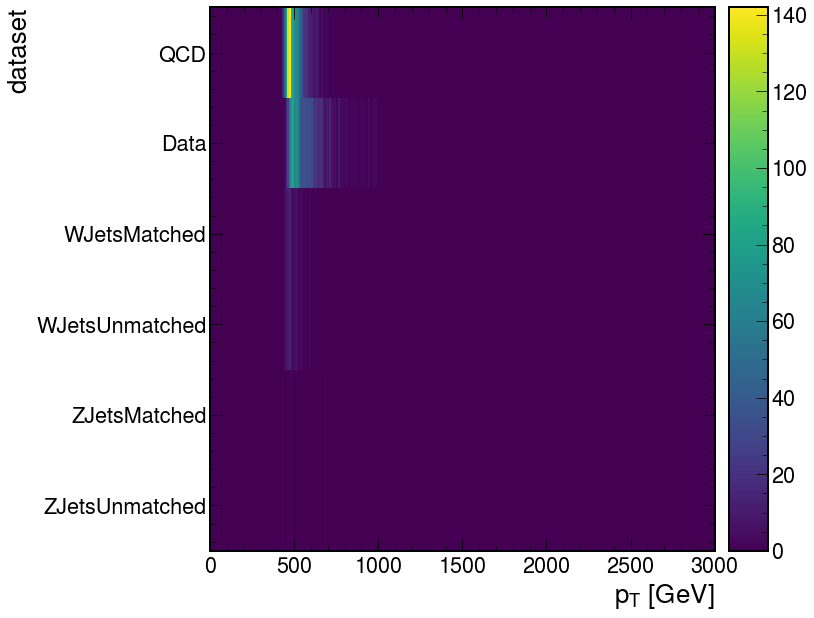

In [168]:
hep.hist2dplot(histsnew_['pt'][:,:,'none'])


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f26a28d10d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f26a4819f50>, text=[])

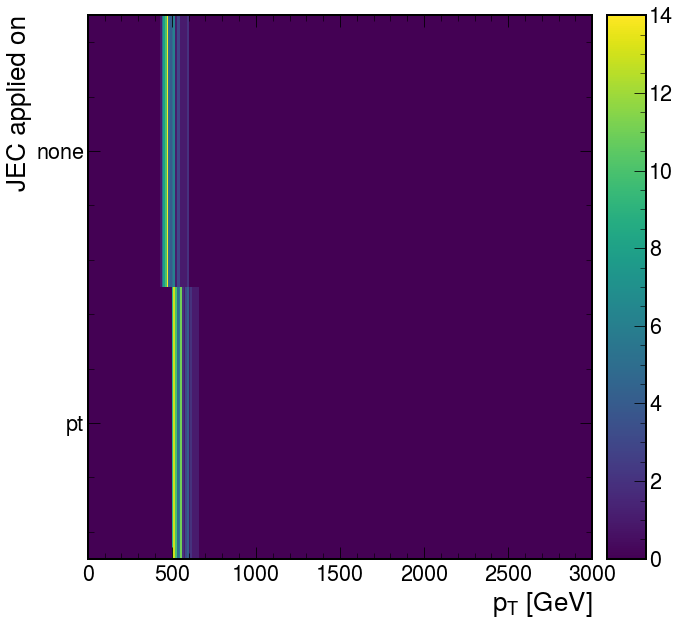

In [174]:
histsnew_['pt'][:,'WJetsMatched',:].plot2d()

In [94]:
import hist as histhist
stack = histhist.Stack.from_dict({n:histsnew_['ttbar_mjet_inclusive'][:,n,:,:] for n in ['nominal','JES_up','JES_down']} )

(0.0, 1500.0)

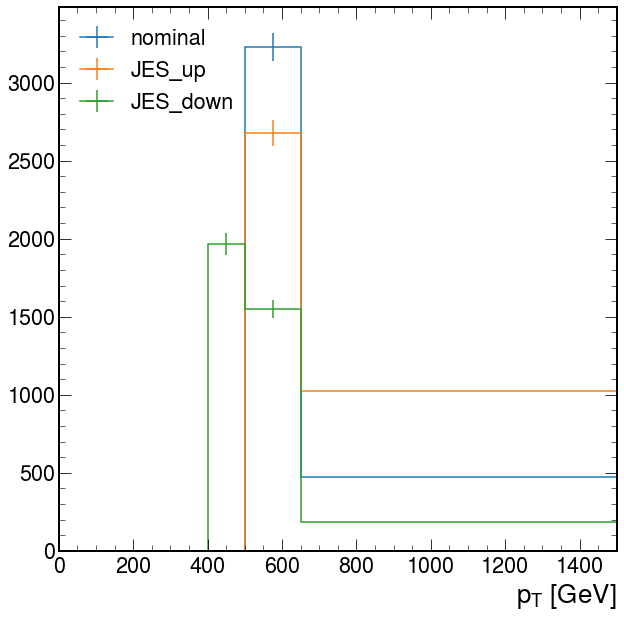

In [106]:
f,ax = plt.subplots()
stack.project('pt').plot(ax=ax)
ax.legend()
ax.set_xlim(0,1500)